# Introduction to data science: classification

[**This notebook is available on Google Colab.**](https://colab.research.google.com/drive/1EcvFm-NiPqzysCrmYLaCm5Ez_TLzw9bt)

You know about the _data_ side of **data science**, now we can find out about the _science_ :)

Data science depends hugely on data, but the _science_ part requires us to select the best (i.e. optimal) model -- and this means having an objective measure of 'best' and a way to prove that you have found it.

In this notebook, we will predict the **lithology** (a fancy name for rock type) from two physical measurements: P-wave velocity (Vp) and bulk density (rho). We will fit a **support vector machine**, a versatile learning algorithm.

First we'll import some data. I'm using an extract from the Rock Property Catalog, https://github.com/scienxlab/datasets/tree/main/rpc

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/scienxlab/datasets/refs/heads/main/rpc/rpc-3-imbalanced.csv'

df = pd.read_csv(url)

df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,101023,Gray Shale,shale,4953.660011,2957.260132,2.71
1,100978,Olentangy Shale,shale,3444.658279,2318.002224,2.68
2,100993,Brown Gas Shale,shale,3507.803917,2218.529940,2.56
3,101048,Shale 2 (Density is assumed constant),shale,2988.889933,1633.329988,2.60
4,100417,Tight gas shale,shale,3642.000000,2221.000000,2.46


In [2]:
df.describe()

,RPC,Vp,Vs,Rho
count,440.000000,440.000000,440.000000,428.000000
mean,101420.745455,4241.400263,2404.569500,2.471570
std,817.462173,1017.116305,623.491742,0.168254
min,100031.000000,1490.711927,839.570000,1.770000
25%,100831.750000,3444.243709,2008.362500,2.387500
50%,101589.000000,4396.045268,2559.060000,2.510000
75%,102179.250000,5150.920000,2858.632148,2.570000
max,102855.000000,5940.000000,3477.690000,2.780000


In [3]:
df = df.dropna()
df.describe()

,RPC,Vp,Vs,Rho
count,428.000000,428.000000,428.000000,428.000000
mean,101416.728972,4264.252350,2421.198342,2.471570
std,819.115935,975.575200,602.540675,0.168254
min,100031.000000,1490.711927,839.570000,1.770000
25%,100827.500000,3473.667509,2043.500000,2.387500
50%,101747.000000,4396.330000,2560.398888,2.510000
75%,102179.250000,5138.904354,2858.632148,2.570000
max,102300.000000,5938.320000,3477.690000,2.780000


In [4]:
target = 'Lithology'
features = ['Vp','Rho']

X = df[features].values
y = df[target].values

A plot is usually the best way to meet the data.

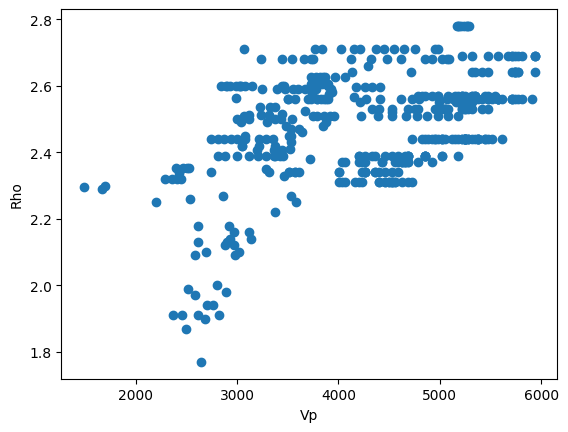

In [5]:
import matplotlib.pyplot as plt

plt.scatter(*X.T)
plt.xlabel('Vp')
_ = plt.ylabel('Rho')

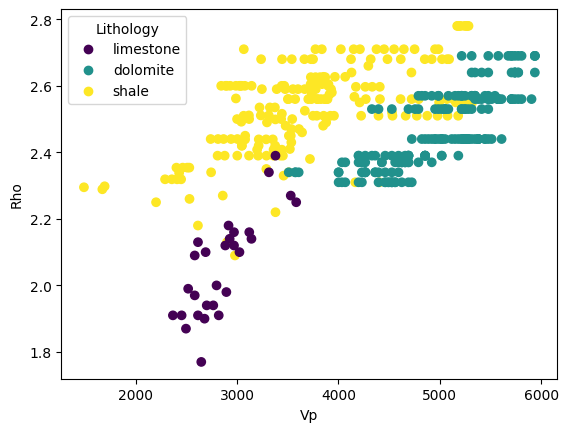

In [6]:
LITHS = ['limestone', 'dolomite', 'shale']

def lith_index(y):
    return [LITHS.index(lith) for lith in y]

fig, ax = plt.subplots()

scatter = ax.scatter(*X.T, c=lith_index(df['Lithology']))
ax.set_xlabel('Vp')
ax.set_ylabel('Rho')
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = LITHS, title="Lithology")

## A linear model: SVM


The **support vector machine** is a reliable classifier.

In [7]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

clf = svc.fit(X, y)

y_pred = clf.predict(X)

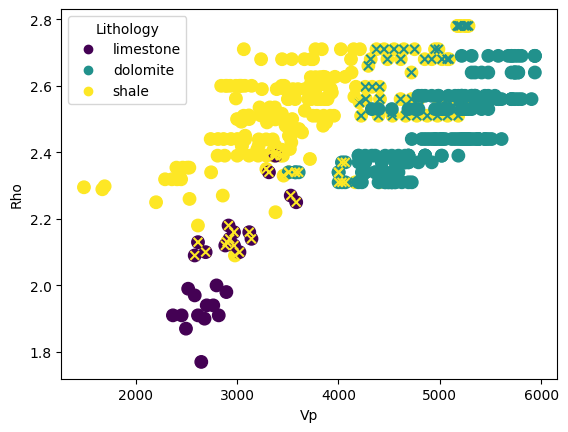

In [8]:
fig, ax = plt.subplots()

scatter = ax.scatter(*X.T, c=lith_index(df['Lithology']), s= 80)
ax.scatter(*X.T, c=lith_index(y_pred), s=40, marker='x')
ax.set_xlabel('Vp')
ax.set_ylabel('Rho')
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = LITHS, title="Lithology")

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.8130841121495327

**❓ What do we think? Are we satisfied?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

## Scoring

Scores matter in all machine learning tasks. It is very common to see people reporting only **accuracy** for classification tasks, or only **R<sup>2</sup>** for regression tasks. It is almost never enough to only look at (or report) the 'obvious' score -- especially for multiclass problems like this one, and especially when there is class imbalance.

**This is one of the most important review papers in all of machine learning: [Raschka 2018](https://arxiv.org/abs/1811.12808). Read it and share it.**

### Confusion matrix

This matrix, and the associated display, are a common way to look at the performance of the estimator.

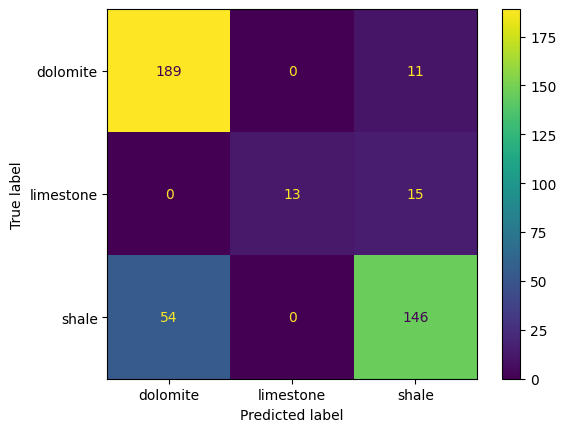

In [10]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc, X, y)

It's worth spending some time to understanding what the matrix is telling you. Think about true predictions, false positives, and false negatives.

### Classification report

This report summarizes some of the information contained in the confusion matrix:

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    dolomite       0.78      0.94      0.85       200
   limestone       1.00      0.46      0.63        28
       shale       0.85      0.73      0.78       200

    accuracy                           0.81       428
   macro avg       0.88      0.71      0.76       428
weighted avg       0.83      0.81      0.81       428



💡 It's worth taking a look at exactly what **precision**, **recall**, **f1**, **macro** and **weighted** (formerly **micro**) mean.

### Visualization

We can also inspect the so-called **decision surface** to see why the model classifies the data as it does.

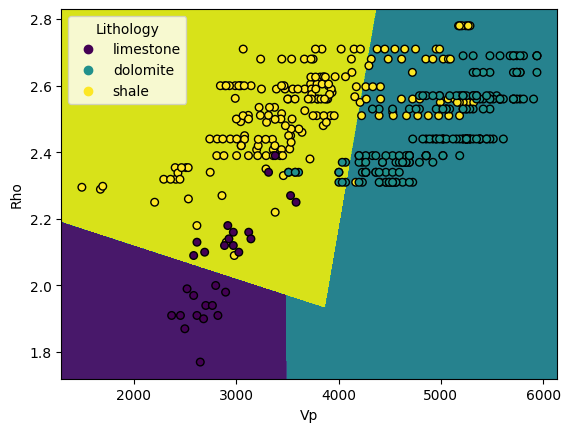

In [12]:
import numpy as np

fig, ax = plt.subplots()

x_min, x_max, y_min, y_max = (X[:,0].min() - 200, X[:,0].max() + 200, 
                              X[:,1].min() - 0.05, X[:,1].max() + 0.05
                             )
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000)
)
grid = np.vstack([xx.ravel(), yy.ravel()]).T

zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = np.array(lith_index(zz)).reshape(xx.shape)
ax.contourf(xx, yy, zz)

scatter = ax.scatter(*X.T, c=lith_index(df['Lithology']), edgecolor='k', s=30)
ax.set_xlabel('Vp')
ax.set_ylabel('Rho')
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = LITHS, title="Lithology")

Sometimes there is also a domain-specific way to look at the results. For example, for wireline log data, we might like to look at a side-by-side comparison of the rock types.

## Validation

Now that we have touched upon different evaluation criteria, we need to address another issue: fairness. Our test was not fair.

We should not train the model then check its accuracy only on that same training dataset. It's cheating, because in the future we'd like to predict on data that the model has never seen. So we should test the model on data it has never seen.

Let's hold out some validation data, or 'blind' data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape

((321, 2), (107, 2))

<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>EXERCISE</h3>

Now let's train a model _on only the training data_ and validate it properly _on only the test data_.

**❓ Do we think the score will be better or worse than before?**
</div>

In [14]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.90      0.87      0.88        60
   limestone       1.00      0.57      0.73         7
       shale       0.76      0.85      0.80        40

    accuracy                           0.84       107
   macro avg       0.88      0.76      0.80       107
weighted avg       0.85      0.84      0.84       107



**❓ What do we need to think about when splitting? In other words: what is the most important thing about the test data?**

&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />

First and foremost, the test data must look like data we expect in the future.

We also need to think about:

- **Independence** — can you shuffle the data without losing information?
- **Identical distributions** — are both the train and test data from the same distribution?
- **Reproducibility** — what can we do to make this reproducible?
- **Stratification** — How can we deal with class imbalance?

Can you demonstrate that the test sample is fair and reproducible?

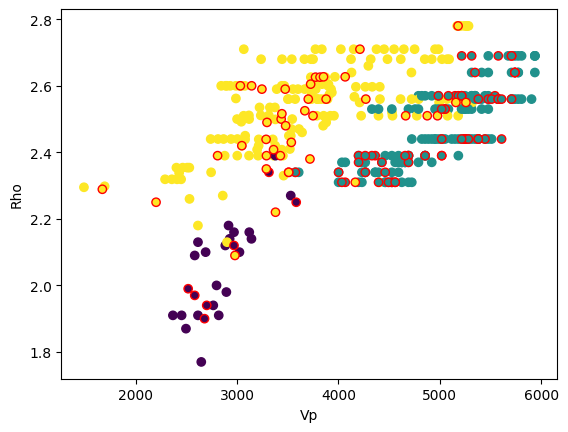

In [15]:
plt.scatter(*X_train.T, c=lith_index(y_train))
plt.scatter(*X_test.T, c=lith_index(y_test), edgecolor='r')
plt.xlabel('Vp')
_ = plt.ylabel('Rho')

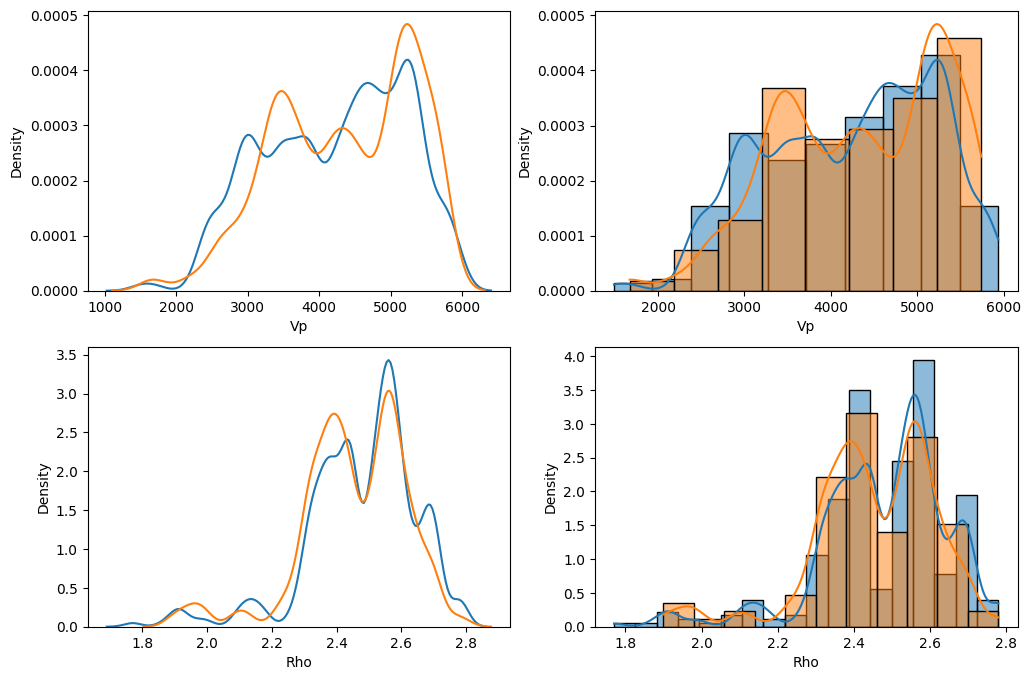

In [16]:
import seaborn as sns

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.kdeplot(X_train[:, 0], bw_adjust=0.5, ax=ax0)
sns.kdeplot(X_test[:, 0], bw_adjust=0.5, ax=ax0)
ax0.set_xlabel('Vp')

sns.histplot(X_train[:, 0], stat='density', kde=True, kde_kws={'bw_adjust':0.5}, legend=False, ax=ax1)
sns.histplot(X_test[:, 0], stat='density', kde=True, kde_kws={'bw_adjust':0.5}, legend=False, ax=ax1)
ax1.set_xlabel('Vp')

sns.kdeplot(X_train[:, 1], bw_adjust=0.5, ax=ax2)
sns.kdeplot(X_test[:, 1], bw_adjust=0.5, ax=ax2)
ax2.set_xlabel('Rho')

sns.histplot(X_train[:, 1], stat='density', kde=True, kde_kws={'bw_adjust':0.5}, legend=False, ax=ax3)
sns.histplot(X_test[:, 1], stat='density', kde=True, kde_kws={'bw_adjust':0.5}, legend=False, ax=ax3)
_ = ax3.set_xlabel('Rho')

Let's do it in the proper reproducible way this time!

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.85      0.96      0.90        48
   limestone       0.67      0.44      0.53         9
       shale       0.85      0.80      0.82        50

    accuracy                           0.84       107
   macro avg       0.79      0.73      0.75       107
weighted avg       0.84      0.84      0.83       107



## A non-linear SVM model

If we employ the **kernel trick** we can fit a nonlinear model. Scikit-learn's `SVC` actually uses this by default:

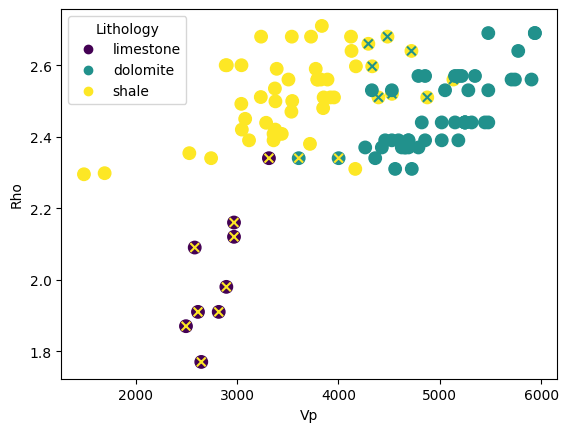

In [18]:
import matplotlib.colors as mcolors

svc = SVC()  # Default is kernel='rbf'
clf = svc.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, ax = plt.subplots()

scatter = ax.scatter(*X_test.T, c=lith_index(y_test), s= 80)
ax.scatter(*X_test.T, c=np.array(lith_index(y_pred)), s=40, marker='x', norm=mcolors.Normalize(vmin=0, vmax=2))
ax.set_xlabel('Vp')
ax.set_ylabel('Rho')
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = LITHS, title="Lithology")

The score is muuuuuuuuuuuch worse, especially for the minority class:

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.85      0.96      0.90        48
   limestone       0.00      0.00      0.00         9
       shale       0.79      0.84      0.82        50

    accuracy                           0.82       107
   macro avg       0.55      0.60      0.57       107
weighted avg       0.75      0.82      0.79       107



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


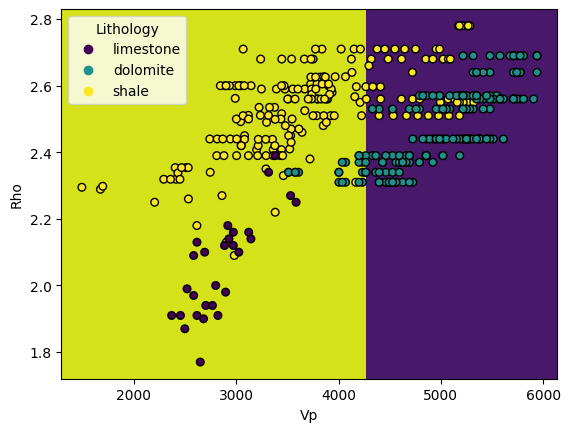

In [20]:
fig, ax = plt.subplots()

x_min, x_max, y_min, y_max = (X[:,0].min() - 200, X[:,0].max() + 200, 
                              X[:,1].min() - 0.05, X[:,1].max() + 0.05
                             )
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000)
)
grid = np.vstack([xx.ravel(), yy.ravel()]).T

zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = np.array(lith_index(zz)).reshape(xx.shape)
ax.contourf(xx, yy, zz)

scatter = ax.scatter(*X.T, c=lith_index(df['Lithology']), edgecolor='k', s=30)
ax.set_xlabel('Vp')
ax.set_ylabel('Rho')
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = LITHS, title="Lithology")

**❓ What could the problem be?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

### Scale matters

Our two features operate on *very* different scales! (m/s and g/cm<sup>3</sup>). Some models do not mind this, others do. SVM is one of those! You can get a numerical feel for it by forcing equal axes while scatterplotting the data:

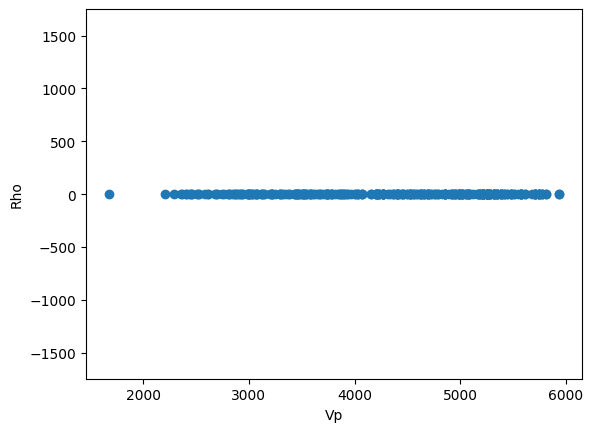

In [21]:
plt.scatter(*X_train.T)
plt.axis('equal')
plt.xlabel('Vp')
_ = plt.ylabel('Rho')

## Standardize the data

It's essential to train SVMs on scaled data, usually the Z-scores of your data, i.e. zero mean, unit variance. This ensures that the different scales of the features is not causing a problem.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

This doesn't change how the data are relatively distributed:

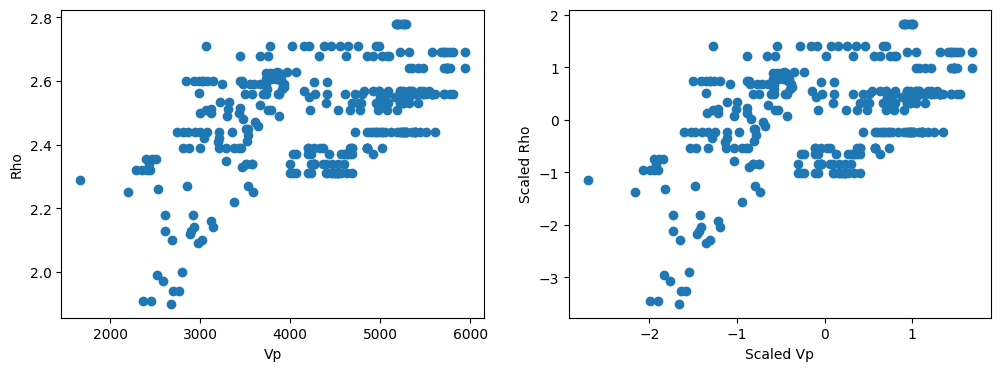

In [24]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12,4))
ax0.scatter(*X_train.T)
ax1.scatter(*X_train_sc.T)
ax0.set_xlabel('Vp')
ax0.set_ylabel('Rho')
ax1.set_xlabel('Scaled Vp')
_ = ax1.set_ylabel('Scaled Rho')

But it dramatically changes how they are distributed in absolute terms:

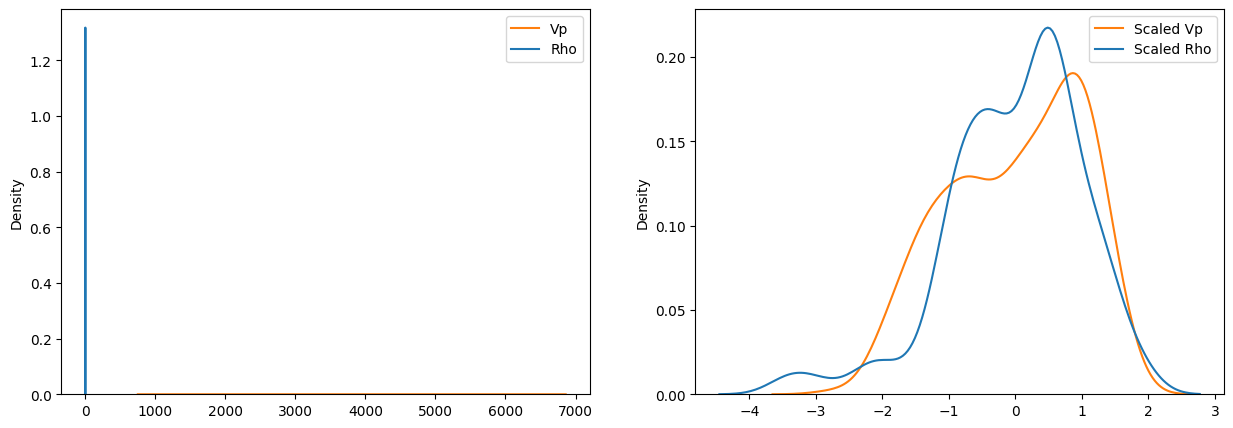

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.kdeplot(X_train[:, [1,0]], ax=axs[0])
sns.kdeplot(X_train_sc[:, [1,0]], ax=axs[1])
axs[0].legend(['Vp', 'Rho'])
_ = axs[1].legend(['Scaled Vp', 'Scaled Rho'])

<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>EXERCISE</h3>

Re-fit the **linear** model and look at the scores.
</div>

In [33]:
svc = SVC()

svc.fit(X_train_sc, y_train)
y_pred_sc = svc.predict(X_test_sc)

print(classification_report(y_test, y_pred_sc))

              precision    recall  f1-score   support

    dolomite       0.94      0.94      0.94        48
   limestone       1.00      0.89      0.94         9
       shale       0.92      0.94      0.93        50

    accuracy                           0.93       107
   macro avg       0.95      0.92      0.94       107
weighted avg       0.94      0.93      0.93       107



                                                 Previous report:

|   | precision    | recall | f1-score | support |
| ---- | ----- | ------- | ------ | -------|
| dolomite | 0.85  | 0.96    | 0.90 | 48 |
| limestone | 0.67 | 0.44    | 0.53 | 9 |
| shale | 0.85   | 0.8    | 0.82 | 50 |
| | | |  |  |
| accuracy |  |  | 0.84 | 107 |
| macro avg | 0.79 | 0.73 | 0.75 | 107  |
| weighted avg | 0.84 | 0.84 | 0.83 | 107 |

Solving one problem gives us a new one. Now we have a new pitfall: it is essential to scale the data now before inference -- although the model will happily make (terrible) predictions.

In [34]:
X_train[-1,:], X_test_sc[-1,:]

(array([1672.118664  ,    2.28900003]), array([ 0.40202771, -0.65764564]))

In [36]:
svc.predict(X_train[-1:].reshape(1,-1)), svc.predict(X_train_sc[-1:].reshape(1,-1))

(array(['shale'], dtype=object), array(['shale'], dtype=object))

This is known as an "out of distribution" or OOD error, and it's a classic pitfall in machine learning.

## Put everything in a pipeline

This is the most flexible way to compose data pipelines in `sklearn`. It is usually better than implementing everything individually in a stepwise manner.

For now, it won't change anything.

In [37]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC(kernel='linear'))

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.92      0.94      0.93        48
   limestone       1.00      0.89      0.94         9
       shale       0.92      0.92      0.92        50

    accuracy                           0.93       107
   macro avg       0.95      0.92      0.93       107
weighted avg       0.93      0.93      0.93       107



And now the nonlinear SVM is basically identical to the linear one:

In [38]:
pipe = make_pipeline(StandardScaler(), SVC())

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.94      0.94      0.94        48
   limestone       1.00      0.89      0.94         9
       shale       0.92      0.94      0.93        50

    accuracy                           0.93       107
   macro avg       0.95      0.92      0.94       107
weighted avg       0.94      0.93      0.93       107



## Hyperparameter tuning

Most algorithms have **hyperparameters** which control how the algorithm learns -- and which often implement some kind of **regularization**. This means different things for different algorithms, but in general it involves simplifying or smoothing the model in some way.

For the [support vector machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), there is a parameter `C` to control the model complexity (an SVM tries to satistfy two critera during optimization: wide margins (how far from the linear separation to the nearest point in each class) and few missclassified instances. Sometimes these constraints compete, and `C` allows us to "select" which criterion the model should prioritize. High `C` means high complexity and low regularization, see this [stackoverflow thread](https://stats.stackexchange.com/a/159051) for a nice visualization of what `C`does).

### Looping!

Let's write a loop to step over values of the regularization parameter `C`. Start with:

    C = np.logspace(-3, 5, 17)
    mean_val, mean_train = [], []
    for Ci in C:
        # Instantiate the pipeline, using `SVC(C=Ci)`.
        # Get the f1_score for both train and test sets.
        # Gather these scores in two lists.

When you have 2 lists of mean scores, plot them and compare how they vary with C. Put the x-axis on a log scale with `plt.xscale('log')`

(1.0, 0.65)

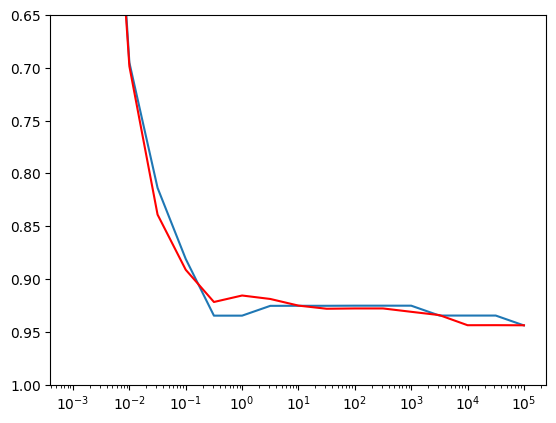

In [41]:
from sklearn.metrics import f1_score

C = np.logspace(-3, 5, 17)
test, train = [], []
for Ci in C:
    # Instantiate the pipeline, using `SVC(C=Ci)`.
    # Get the f1_score for both train and test sets.
    # Gather these scores in two lists.
    pipe = make_pipeline(StandardScaler(), SVC(C=Ci))
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    test.append(f1_score(y_test, y_pred, average='weighted'))
    y_pred = pipe.predict(X_train)
    train.append(f1_score(y_train, y_pred, average='weighted'))

plt.plot(C, test)
plt.plot(C, train, c='r')
plt.xscale('log')
plt.ylim(1.0,0.65)

**❓ Do you see a potential issue here?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

Sometimes you will get a lucky test split, sometimes not. This feels a bit aribtrary. And we might overfit this model selection process to the particular test set that we have.

## Cross validation

Instead of choosing a single holdout set for evaluation, we can choose many. This is useful for tuning hyperparameters, for example.

But then we have more ways to leak information into our evaluation, so it is smart to continue to hold out our `val` set.

The other catch is that we now must use a pipeline, otherwise we leak information in the scaling of the data.

Fair evaluation is hard!

But now we can use folded cross-validation in a safe way:

In [42]:
from sklearn.model_selection import cross_validate, StratifiedKFold
#from sklearn.metrics import make_scorer

pipe = make_pipeline(StandardScaler(), SVC(C=0.1))
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
# StratifiedKFold is useful for handling potential class imbalanced splits!

cross_validate(pipe,
               X_train, y_train,
               scoring='f1_weighted',
               cv=skf,
               return_train_score=True,
               # Also useful: groups
              )

{'fit_time': array([0.00427485, 0.00220871, 0.00219321, 0.00206947, 0.00198793]),
 'score_time': array([0.00331497, 0.00311494, 0.00196028, 0.00186348, 0.00186992]),
 'test_score': array([0.81680449, 0.89941406, 0.87792969, 0.84570312, 0.8555791 ]),
 'train_score': array([0.84841807, 0.8717864 , 0.83308833, 0.83729494, 0.88475887])}

Notice that we no longer use `test` during the model fitting process.

<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>EXERCISE</h3>

Use cross-validation in the loop over values of `C`. Start with:

    C = np.logspace(-3, 5, 17)
    mean_val, mean_train = [], []
    for Ci in C:
        # Instantiate the pipeline, using `SVC(C=Ci)`.
        # Do the cross validation model fits with `cross_validate()`.
        # Gather the means of the test and train scores.

Then make the plot, as before.
</div>

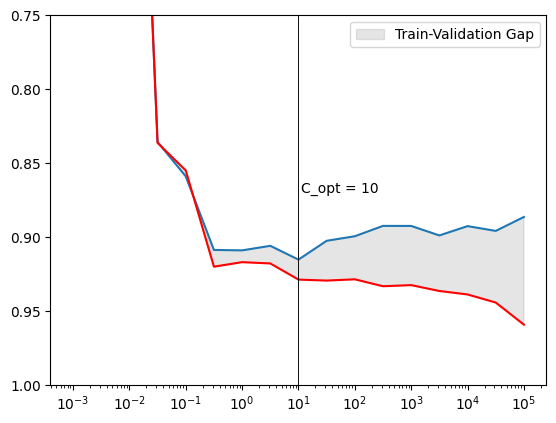

In [50]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate, StratifiedKFold

C = np.logspace(-3, 5, 17)
mean_val, mean_train = [], []
for Ci in C:
    # Instantiate the pipeline, using `SVC(C=Ci)`.
    # Get the f1_score for both train and test sets.
    # Gather these scores in two lists.
    pipe = make_pipeline(StandardScaler(), SVC(C=Ci))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
    # StratifiedKFold is useful for handling potential class imbalanced splits!

    cv = cross_validate(pipe,
                X_train, y_train,
                scoring='f1_weighted',
                cv=skf,
                return_train_score=True,
                # Also useful: groups
                )
    mean_train.append(np.mean(cv['train_score']))
    mean_val.append(np.mean(cv['test_score']))

C_opt = C[np.argmax(mean_val)]

plt.plot(C, mean_val)
plt.plot(C, mean_train, c='r')
plt.fill_between(C, mean_train, mean_val, color='gray', alpha=0.2, label='Train-Validation Gap')
plt.axvline(C_opt, c='k', lw=0.67)
plt.text(1.1*C_opt, 0.87, f"C_opt = {C_opt:.3g}", color='black')
plt.xscale('log')
plt.ylim(1.0,0.75)
_ = plt.legend()

## Explore the model zoo!

<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>EXERCISE</h3>

- Add `Vs` (shear velocity) to the features and see if it improves the prediction quality.
- Choose another algorithm to try a prediction with, and implement it in a pipeline.
- Choose a hyperparameter of the new algorithm and tune it. (If you have done this kind of thing before, try tuning 2 or 3 hyperparameters with grid or random search.)
</div>

## Test

When you have tuned the predictor and are satisfied that it is as good as it can be, you can test your prediction power.

In [51]:
C_opt = C[np.argmax(mean_val)]
C_opt
C_opt = 5.0 # Alternatively, use C_opt = 5.0, which you get from a more refined search space

In [52]:
pipe = make_pipeline(StandardScaler(), SVC(C=C_opt))

pipe.fit(X_train, y_train)
                    
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.94      0.92      0.93        48
   limestone       1.00      0.89      0.94         9
       shale       0.90      0.94      0.92        50

    accuracy                           0.93       107
   macro avg       0.95      0.92      0.93       107
weighted avg       0.93      0.93      0.93       107



Compare with the model with default `C`:

In [53]:
pipe = make_pipeline(StandardScaler(), SVC())

pipe.fit(X_train, y_train)
                    
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.94      0.94      0.94        48
   limestone       1.00      0.89      0.94         9
       shale       0.92      0.94      0.93        50

    accuracy                           0.93       107
   macro avg       0.95      0.92      0.94       107
weighted avg       0.94      0.93      0.93       107



If you are satisfied (think hard about what this means... you really have to decide before you start the model fitting process) then you are ready to fit the final model. If not, you must start all over again.

## Using this model

We do not want to use this model &mdash; if we like its performance then we should now retrain it on all the data. Presumably, this new model will be at least as good as the one trained on the training set, we just don't have a way to check it now 😬

In [54]:
scaler = StandardScaler().fit(X)
X_ = scaler.transform(X)
svc = SVC(C=C_opt).fit(X_, y)

There is no way for us to test this model, but we should monitor it in production.

<hr />

<p style="color:gray"> adapted from &copy; 2025 Matt Hall / Equinor CC BY.</p>